<a href="https://colab.research.google.com/github/heysourin/NLP-101/blob/main/LSTM%20/Text-Pred/LSTM_Text_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [4]:
from google.colab import files
uploaded = files.upload()

Saving text-pred-sample.txt to text-pred-sample.txt


In [53]:
file = open("/content/text-pred-sample.txt", 'r', encoding='utf-8')

In [54]:
# Storing the file in list
lines = []
for i in file:
  lines.append(i)

# Converting list to string
data = ' '.join(lines)

# Replacing unnecessary stuff with space
data = data.replace('\n', '').replace('\r','').replace('\ufeff','').replace('“', '').replace("” ","").replace("'","").replace(":","")

# removing unncessary spaces
data = data.split()
data = ' '.join(data)

In [ ]:
data

In [25]:
len(data)

732808

In [55]:
# apply tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

pickle.dump(tokenizer, open('token.pkl', 'wb'))

# sequence_data = tokenizer.texts_to_sequences([data])[0] #

sequence_data = tokenizer.texts_to_sequences([data])
sequence_data = tf.squeeze(sequence_data) # converting 2D array to 1D
len(sequence_data)

131163

In [29]:
sequence_data

<tf.Tensor: shape=(131163,), dtype=int32, numpy=array([   1,  181,  443, ...,  126,  539, 1756], dtype=int32)>

In [35]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'of': 3, 'and': 4, 'her': 5, 'i': 6, 'a': 7, 'in': 8, 'was': 9, 'she': 10, 'that': 11, 'it': 12, 'not': 13, 'you': 14, 'he': 15, 'his': 16, 'be': 17, 'as': 18, 'had': 19, 'with': 20, 'for': 21, 'but': 22, 'is': 23, 'have': 24, 'at': 25, 'mr': 26, 'him': 27, 'on': 28, 'my': 29, 'by': 30, 'all': 31, 'they': 32, 'so': 33, 'elizabeth': 34, 'which': 35, 'were': 36, 'been': 37, 'could': 38, 'from': 39, 'no': 40, 'this': 41, 'very': 42, 'what': 43, 'would': 44, 'your': 45, 'me': 46, 'their': 47, 'them': 48, 'will': 49, 'said': 50, 'such': 51, 'or': 52, 'are': 53, 'when': 54, 'if': 55, 'darcy': 56, 'an': 57, 'there': 58, 'do': 59, 'mrs': 60, 'much': 61, 'more': 62, 'must': 63, 'am': 64, 'any': 65, 'miss': 66, 'bennet': 67, 'than': 68, 'who': 69, 'one': 70, 'did': 71, 'we': 72, 'jane': 73, 'bingley': 74, 'should': 75, 'has': 76, 'know': 77, 'how': 78, 'other': 79, 'though': 80, 'herself': 81, 'before': 82, 'well': 83, 'never': 84, 'can': 85, 'only': 86, 'think': 87, 'may': 8

In [56]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7272

In [57]:
sequences = []

for i in range(3, len(sequence_data)):
  words = sequence_data[i-3:i+4] # Takinig 5 words for prediction, 4 words will tryna predict the 5th
  sequences.append(words)

print("The length of sequences are: ", len(sequences))

# Padding
max_length = max(len(seq) for seq in sequences)
padded_sequences = np.zeros((len(sequences), max_length))
for i, seq in enumerate(sequences):
    padded_sequences[i, :len(seq)] = seq

# Convert padded sequences to a NumPy array
sequences = np.array(padded_sequences)

# Print the first 10 elements of the array
sequences[:10]

The length of sequences are:  131160


array([[   1.,  181.,  443., 1000.,    3.,  298.,    4.],
       [ 181.,  443., 1000.,    3.,  298.,    4.,  946.],
       [ 443., 1000.,    3.,  298.,    4.,  946.,   41.],
       [1000.,    3.,  298.,    4.,  946.,   41., 1000.],
       [   3.,  298.,    4.,  946.,   41., 1000.,   23.],
       [ 298.,    4.,  946.,   41., 1000.,   23.,   21.],
       [   4.,  946.,   41., 1000.,   23.,   21.,    1.],
       [ 946.,   41., 1000.,   23.,   21.,    1.,  507.],
       [  41., 1000.,   23.,   21.,    1.,  507.,    3.],
       [1000.,   23.,   21.,    1.,  507.,    3.,  549.]])

In [58]:
X = []
y = []

for i in sequences:
  X.append(i[0:6])
  y.append(i[6])

In [59]:
X = np.array(X)
y = np.array(y)

In [60]:
X

array([[1.000e+00, 1.810e+02, 4.430e+02, 1.000e+03, 3.000e+00, 2.980e+02],
       [1.810e+02, 4.430e+02, 1.000e+03, 3.000e+00, 2.980e+02, 4.000e+00],
       [4.430e+02, 1.000e+03, 3.000e+00, 2.980e+02, 4.000e+00, 9.460e+02],
       ...,
       [7.271e+03, 2.000e+00, 2.300e+02, 1.260e+02, 5.390e+02, 1.756e+03],
       [2.000e+00, 2.300e+02, 1.260e+02, 5.390e+02, 1.756e+03, 0.000e+00],
       [2.300e+02, 1.260e+02, 5.390e+02, 1.756e+03, 0.000e+00, 0.000e+00]])

In [61]:
# One Hot Encoding the output
y = to_categorical(y, num_classes=vocab_size)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
# Model:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=10, input_length=6))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 6, 10)             72720     
                                                                 
 lstm_6 (LSTM)               (None, 6, 1000)           4044000   
                                                                 
 lstm_7 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_6 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_7 (Dense)             (None, 7272)              7279272   
                                                                 
Total params: 20400992 (77.82 MB)
Trainable params: 20400992 (77.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


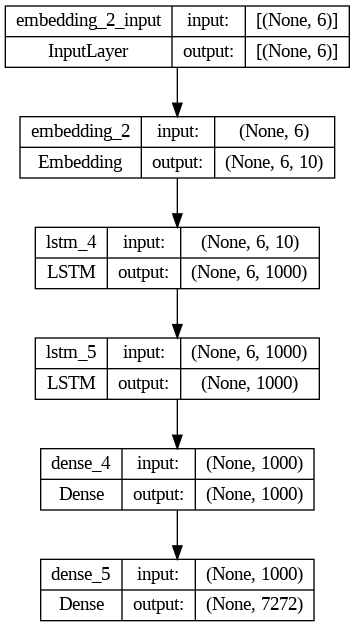

In [63]:
# Plot the model:
from tensorflow import keras
keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True, show_shapes=True)

In [70]:
# Training
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001))

In [ ]:
model.fit(X, y, epochs=30, batch_size=64, callbacks=[checkpoint])

In [66]:
# Prediction:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def predict_next_word(model, tokenizer, text):
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted_word = key
      break

  print(predicted_word)
  return predicted_word

In [67]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
    print("Execution completed!!!")
    break

  else:
    try:
      text = text.split(" ")
      text = text[-6:]
      print(text)

      predict_next_word(model, tokenizer, text)

    except Exception as e:
      print("Error occurred: ",e)
      continue

Enter your line: have not the slightest
['have', 'not', 'the', 'slightest']
Error occurred:  in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py",